In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# read data into DataFrame
training = pd.read_csv('./data/train.csv')
testing = pd.read_csv('./data/test.csv')

In [3]:
#  show dataset info
training.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              17892 non-null  int64  
 1   Province/State  8190 non-null   object 
 2   Country/Region  17892 non-null  object 
 3   Lat             17892 non-null  float64
 4   Long            17892 non-null  float64
 5   Date            17892 non-null  object 
 6   ConfirmedCases  17892 non-null  float64
 7   Fatalities      17892 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [5]:
# transfer the Date column to datetime type
training['Date'] = training['Date'].apply(lambda d: datetime.datetime.strptime(d,'%Y-%m-%d').date())
testing['Date'] = testing['Date'].apply(lambda d: datetime.datetime.strptime(d,'%Y-%m-%d').date())

Text(0.5, 1.0, 'The whole word ConfirmedCases vs. data')

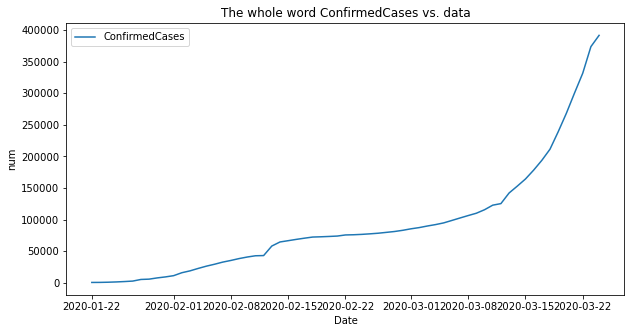

In [6]:
plt.figure(figsize=(10, 5))
training.groupby(['Date']).sum()['ConfirmedCases'].plot(label='ConfirmedCases')
plt.ylabel('num')
plt.legend()
plt.title('The whole word ConfirmedCases vs. data')

Text(0.5, 1.0, 'The whole word Fatalities vs. data')

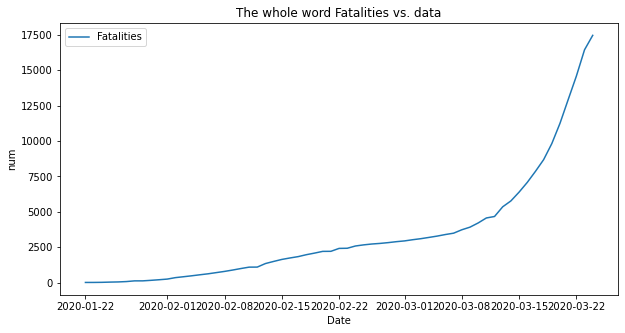

In [7]:
plt.figure(figsize=(10, 5))
training.groupby(['Date']).sum()['Fatalities'].plot(label='Fatalities')
plt.ylabel('num')
plt.legend()
plt.title('The whole word Fatalities vs. data')

Text(0.5, 1.0, 'First 10 coutries have most ConfirmedCases')

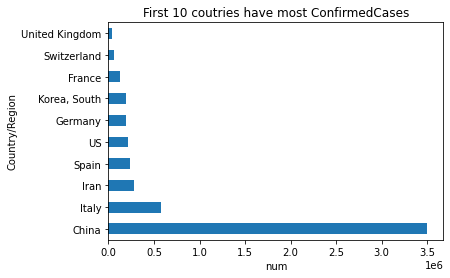

In [8]:
training.groupby(['Country/Region']).sum()['ConfirmedCases'].sort_values(ascending=False)[0: 10].plot.barh()
plt.xlabel('num')
plt.title('First 10 coutries have most ConfirmedCases')

In [9]:
training.groupby(['Country/Region']).sum()['ConfirmedCases'].sort_values(ascending=False)[0: 10].index

Index(['China', 'Italy', 'Iran', 'Spain', 'US', 'Germany', 'Korea, South',
       'France', 'Switzerland', 'United Kingdom'],
      dtype='object', name='Country/Region')

Text(0.5, 1.0, 'First 10 coutries have most Fatalities')

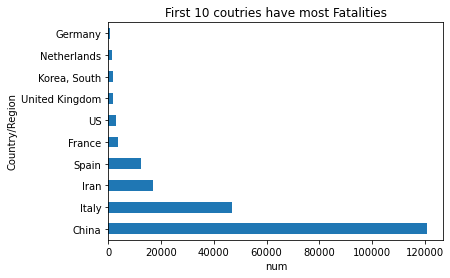

In [10]:
training.groupby(['Country/Region']).sum()['Fatalities'].sort_values(ascending=False)[0: 10].plot.barh()
plt.xlabel('num')
plt.title('First 10 coutries have most Fatalities')

In [11]:
training.groupby(['Country/Region']).sum()['Fatalities'].sort_values(ascending=False)[0: 10].index

Index(['China', 'Italy', 'Iran', 'Spain', 'France', 'US', 'United Kingdom',
       'Korea, South', 'Netherlands', 'Germany'],
      dtype='object', name='Country/Region')

In [12]:
# filter data that is overlap in testing
training = training[training['Date'] < min(testing['Date'])]

In [13]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14200 entries, 0 to 17878
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              14200 non-null  int64  
 1   Province/State  6500 non-null   object 
 2   Country/Region  14200 non-null  object 
 3   Lat             14200 non-null  float64
 4   Long            14200 non-null  float64
 5   Date            14200 non-null  object 
 6   ConfirmedCases  14200 non-null  float64
 7   Fatalities      14200 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 998.4+ KB


In [14]:
# feture engineering: get log ConfirmedCases and Fatalities
training['logConfirmedCases'] = np.log(training['ConfirmedCases'] + 1)
training['logFatalities'] = np.log(training['Fatalities'] + 1)

In [15]:
# # feture engineering: get diffs of each date from the min date
training['Day'] = training['Date'].apply(lambda d: (d - min(training['Date'])).days + 1)
testing['Day'] = testing['Date'].apply(lambda d: (d - min(training['Date'])).days + 1)

In [16]:
# feture engineering: transfer non-numeric columns to categorical numeric
encoder = OrdinalEncoder()

training['State'] = encoder.fit_transform(training['Province/State'].fillna('na').values.reshape(-1, 1))
testing['State'] = encoder.transform(testing['Province/State'].fillna('na').values.reshape(-1, 1))

training['Country'] = encoder.fit_transform(training['Country/Region'].fillna('na').values.reshape(-1, 1))
testing['Country'] = encoder.transform(testing['Country/Region'].fillna('na').values.reshape(-1, 1))

In [17]:
training.head(20)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,logConfirmedCases,logFatalities,Day,State,Country
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0.0,0.0,1,128.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0.0,0.0,2,128.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0.0,0.0,3,128.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0.0,0.0,4,128.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0.0,0.0,5,128.0,0.0
5,6,NaN,Afghanistan,33.0,65.0,2020-01-27,0.0,0.0,0.0,0.0,6,128.0,0.0
6,7,NaN,Afghanistan,33.0,65.0,2020-01-28,0.0,0.0,0.0,0.0,7,128.0,0.0
7,8,NaN,Afghanistan,33.0,65.0,2020-01-29,0.0,0.0,0.0,0.0,8,128.0,0.0
8,9,NaN,Afghanistan,33.0,65.0,2020-01-30,0.0,0.0,0.0,0.0,9,128.0,0.0
9,10,NaN,Afghanistan,33.0,65.0,2020-01-31,0.0,0.0,0.0,0.0,10,128.0,0.0


Text(69.0, 0.5, 'feature names')

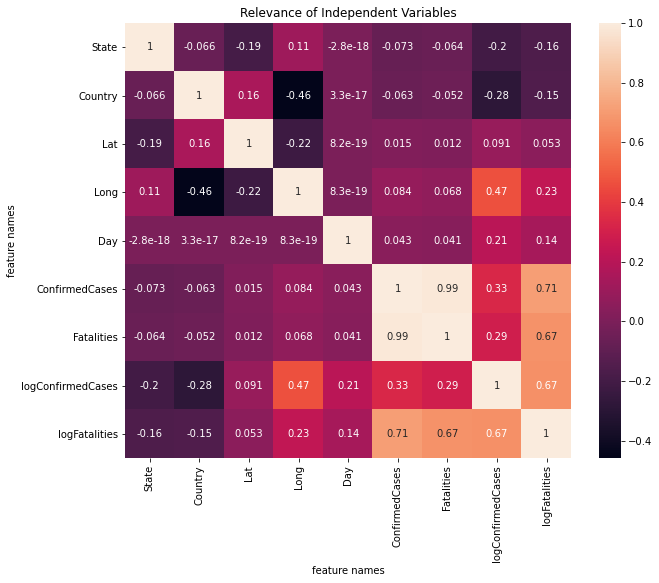

In [18]:
# explore Relevance of Independent Variables via heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(training[['State', 'Country', 'Lat', 'Long', 'Day', 'ConfirmedCases', 'Fatalities', 'logConfirmedCases',
                      'logFatalities']].corr(), annot=True)
plt.title('Relevance of Independent Variables')
plt.xlabel('feature names')
plt.ylabel('feature names')

In [20]:
# build regression model
dr = DecisionTreeRegressor(random_state=0)

# parameter grid
params = {'criterion': ['mse', 'friedman_mse', 'mae'], 'ccp_alpha': [0.001, 0.01, 0, 1]}

In [21]:
# for ConfirmedCases, use GridSearchCV to find the optimal parameters with root_mean_squared_error
clf = GridSearchCV(dr, params, scoring='neg_root_mean_squared_error', cv=5)
clf.fit(training[['State', 'Country', 'Lat', 'Long', 'Day']], training['logConfirmedCases'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.01, 0, 1],
                         'criterion': ['mse', 'friedman_mse', 'mae']},
             scoring='neg_root_mean_squared_error')

In [22]:
print('best_score: ', clf.best_score_)
print('best_params: ', clf.best_params_)

best_score:  -1.5615612659397362
best_params:  {'ccp_alpha': 0.01, 'criterion': 'mse'}


In [24]:
# scores of feature importance
clf.best_estimator_.feature_importances_

array([0.08018698, 0.02449544, 0.27287426, 0.54535842, 0.0770849 ])

In [25]:
# for ConfirmedCases, use GridSearchCV to find the optimal parameters with r2
clf = GridSearchCV(dr, params, scoring='r2', cv=5)
clf.fit(training[['State', 'Country', 'Lat', 'Long', 'Day']], training['logConfirmedCases'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.01, 0, 1],
                         'criterion': ['mse', 'friedman_mse', 'mae']},
             scoring='r2')

In [26]:
print('best_score: ', clf.best_score_)
print('best_params: ', clf.best_params_)

best_score:  -0.04485798638798422
best_params:  {'ccp_alpha': 0.01, 'criterion': 'mse'}


In [27]:
clf.best_estimator_.feature_importances_

array([0.08018698, 0.02449544, 0.27287426, 0.54535842, 0.0770849 ])

In [28]:
# for Fatalities, use GridSearchCV to find the optimal parameters with root_mean_squared_error
clf = GridSearchCV(dr, params, scoring='neg_root_mean_squared_error', cv=5)
clf.fit(training[['State', 'Country', 'Lat', 'Long', 'Day']], training['logFatalities'])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.01, 0, 1],
                         'criterion': ['mse', 'friedman_mse', 'mae']},
             scoring='neg_root_mean_squared_error')

In [29]:
print('best_score: ', clf.best_score_)
print('best_params: ', clf.best_params_)

best_score:  -0.479110348879798
best_params:  {'ccp_alpha': 0.01, 'criterion': 'mse'}


In [30]:
clf.best_estimator_.feature_importances_

array([0., 0., 0., 1., 0.])

In [37]:
# for Fatalities, use GridSearchCV to find the optimal parameters with r2
clf = GridSearchCV(dr, params, scoring='r2', cv=5)
clf.fit(training[['State', 'Country', 'Lat', 'Long', 'Day']], training['logFatalities'])

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(ccp_alpha=0.001, criterion='mae',
                                             random_state=0),
             param_grid={'ccp_alpha': [0.001, 0.01, 0, 1],
                         'criterion': ['mse', 'friedman_mse', 'mae']},
             scoring='r2')

In [38]:
print('best_score: ', clf.best_score_)
print('best_params: ', clf.best_params_)

best_score:  -0.05334623783757127
best_params:  {'ccp_alpha': 0.001, 'criterion': 'mae'}


In [39]:
clf.best_estimator_.feature_importances_

array([0., 0., 0., 0., 0.])

In [33]:
# forecast ConfirmedCases on testing dataset
dr = DecisionTreeRegressor(ccp_alpha=0.01, criterion='mse', random_state=0)
dr.fit(training[['State', 'Country', 'Lat', 'Long', 'Day']], training['logConfirmedCases'])
testing['logConfirmedCases'] = dr.predict(testing[['State', 'Country', 'Lat', 'Long', 'Day']])
testing['ConfirmedCases'] = np.exp(testing['logConfirmedCases'])

In [34]:
# forecast Fatalities on testing dataset
dr = DecisionTreeRegressor(ccp_alpha=0.01, criterion='mse', random_state=0)
dr.fit(training[['State', 'Country', 'Lat', 'Long', 'Day']], training['logFatalities'])
testing['logFatalities1'] = dr.predict(testing[['State', 'Country', 'Lat', 'Long', 'Day']])
testing['Fatalities1'] = np.exp(testing['logFatalities1'])

In [35]:
# forecast Fatalities on testing dataset
dr = DecisionTreeRegressor(ccp_alpha=0.001, criterion='mae', random_state=0)
dr.fit(training[['State', 'Country', 'Lat', 'Long', 'Day']], training['logFatalities'])
testing['logFatalities2'] = dr.predict(testing[['State', 'Country', 'Lat', 'Long', 'Day']])
testing['Fatalities2'] = np.exp(testing['logFatalities2'])